In [5]:
import pandas as pd 
import numpy as np
df = pd.DataFrame({
    'Population': [35.467, 63.951, 80.94 , 60.665, 127.061, 64.511, 318.523],
    'GDP': [
        1785387,
        2833687,
        3874437,
        2167744,
        4602367,
        2950039, 17348075],
    'Surface Area': [
        9984670,
        640679,
        357114,
        301336,
        377930,
        242495,
        9525067
    ],
    'HDI': [
        0.913,
        0.888,
        0.916,
        0.873,
        0.891,
        0.907,
        0.915
    ],
    'Continent': [
        'America',
        'Europe',
        'Europe',
        'Europe',
        'Asia',
        'Europe',
        'America'
    ]
}, columns=['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'])

In [6]:
df

,Population,GDP,Surface Area,HDI,Continent
0,35.467,1785387,9984670,0.913,America
1,63.951,2833687,640679,0.888,Europe
2,80.940,3874437,357114,0.916,Europe
3,60.665,2167744,301336,0.873,Europe
4,127.061,4602367,377930,0.891,Asia
5,64.511,2950039,242495,0.907,Europe
6,318.523,17348075,9525067,0.915,America


In [7]:
df.index = [ 'Canada','France','Germany', 'Italy', 'Japan',' United Kingdom','United States',]

In [8]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [9]:
df.columns

Index(['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'], dtype='object')

In [10]:
df.index

Index(['Canada', 'France', 'Germany', 'Italy', 'Japan', ' United Kingdom',
       'United States'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Canada to United States
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    7 non-null      float64
 1   GDP           7 non-null      int64  
 2   Surface Area  7 non-null      int64  
 3   HDI           7 non-null      float64
 4   Continent     7 non-null      object 
dtypes: float64(2), int64(2), object(1)
memory usage: 336.0+ bytes


In [12]:
df.size

35

In [13]:
df.shape

(7, 5)

In [15]:
df.describe()

,Population,GDP,Surface Area,HDI
count,7.000000,7.000000e+00,7.000000e+00,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429
std,97.249970,5.494020e+06,4.576187e+06,0.016592
min,35.467000,1.785387e+06,2.424950e+05,0.873000
25%,62.308000,2.500716e+06,3.292250e+05,0.889500
50%,64.511000,2.950039e+06,3.779300e+05,0.907000
75%,104.000500,4.238402e+06,5.082873e+06,0.914000
max,318.523000,1.734808e+07,9.984670e+06,0.916000


In [16]:
df.dtypes

Population      float64
GDP               int64
Surface Area      int64
HDI             float64
Continent        object
dtype: object

In [17]:
df.dtypes.value_counts()

float64    2
int64      2
object     1
Name: count, dtype: int64

Indexing, Selection and Slicing

Individual columns in the DataFrame can be selected with regular indexing. Each column is represented as a Series:



In [18]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [19]:
df.loc['Canada']

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [20]:
df.iloc[-1]

Population       318.523
GDP             17348075
Surface Area     9525067
HDI                0.915
Continent        America
Name: United States, dtype: object

In [22]:
df['Population']

Canada              35.467
France              63.951
Germany             80.940
Italy               60.665
Japan              127.061
 United Kingdom     64.511
United States      318.523
Name: Population, dtype: float64

Note that the index of the returned Series is the same as the DataFrame one. And its name the name of the column , if you are working on a notebook and want to see a more DataFramee like format you can use the to_frame method.


In [23]:
df['Population'].to_frame()

,Population
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


In [24]:
df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744
Japan,127.061,4602367
United Kingdom,64.511,2950039
United States,318.523,17348075


In [25]:
df.loc['France': 'Italy', ['Population', 'GDP']]

,Population,GDP
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744


iloc works with the numeric "position" off the index:

In [26]:
df.iloc[-1]

Population       318.523
GDP             17348075
Surface Area     9525067
HDI                0.915
Continent        America
Name: United States, dtype: object

In [27]:
df.iloc[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe


Conditional Selection(boolean arrays)
We saw condittional selection applied to series and it'll work in the same way for DataFrames. After all, a DataFrame is a collection of series:

In [29]:
df.loc[df['Population']>70,['Population','GDP']]

,Population,GDP
Germany,80.940,3874437
Japan,127.061,4602367
United States,318.523,17348075


Dropping Stuff
Opposed to the concept of selection, we have "dropping". Instead of pointing out which values you'd like to select you could point which ones you'd like to drop:



In [31]:
df.drop('Canada')

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [34]:
df.drop(['Italy','France'], axis =0)

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [35]:
df.drop(['Population', 'HDI'], axis =1)

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


Operations

In [36]:
df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744
Japan,127.061,4602367
United Kingdom,64.511,2950039
United States,318.523,17348075


In [37]:
df[['Population', 'GDP']]/100

,Population,GDP
Canada,0.35467,17853.87
France,0.63951,28336.87
Germany,0.80940,38744.37
Italy,0.60665,21677.44
Japan,1.27061,46023.67
United Kingdom,0.64511,29500.39
United States,3.18523,173480.75


In [39]:
crisis = pd.Series([-1000000, -0.3], index = ['GDP', 'HDI'])
crisis

GDP   -1000000.0
HDI         -0.3
dtype: float64

In [40]:
df[['GDP', 'HDI']] + crisis

,GDP,HDI
Canada,785387.0,0.613
France,1833687.0,0.588
Germany,2874437.0,0.616
Italy,1167744.0,0.573
Japan,3602367.0,0.591
United Kingdom,1950039.0,0.607
United States,16348075.0,0.615


In [69]:
langs = pd.Series(['French', 'German', 'Italian', ' Japanese'],
                  index= ['France', 'Germany', 'Italy','Japan'],
                  name = 'language')

In [70]:
langs

France        French
Germany       German
Italy        Italian
Japan       Japanese
Name: language, dtype: object

In [71]:
df['language'] = langs

In [72]:
df

,Population,GDP,Surface Area,HDI,Continent,language
Canada,35.467,1785387,9984670,0.913,America,NaN
France,63.951,2833687,640679,0.888,Europe,French
Germany,80.940,3874437,357114,0.916,Europe,German
Italy,60.665,2167744,301336,0.873,Europe,Italian
Japan,127.061,4602367,377930,0.891,Asia,Japanese
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN
United States,318.523,17348075,9525067,0.915,America,NaN


In [73]:
df

,Population,GDP,Surface Area,HDI,Continent,language
Canada,35.467,1785387,9984670,0.913,America,NaN
France,63.951,2833687,640679,0.888,Europe,French
Germany,80.940,3874437,357114,0.916,Europe,German
Italy,60.665,2167744,301336,0.873,Europe,Italian
Japan,127.061,4602367,377930,0.891,Asia,Japanese
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN
United States,318.523,17348075,9525067,0.915,America,NaN


In [67]:
df['language'] = langs


In [74]:
df

,Population,GDP,Surface Area,HDI,Continent,language
Canada,35.467,1785387,9984670,0.913,America,NaN
France,63.951,2833687,640679,0.888,Europe,French
Germany,80.940,3874437,357114,0.916,Europe,German
Italy,60.665,2167744,301336,0.873,Europe,Italian
Japan,127.061,4602367,377930,0.891,Asia,Japanese
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN
United States,318.523,17348075,9525067,0.915,America,NaN


In [75]:
df['Language'] = 'English'

In [76]:
df

,Population,GDP,Surface Area,HDI,Continent,language,Language
Canada,35.467,1785387,9984670,0.913,America,NaN,English
France,63.951,2833687,640679,0.888,Europe,French,English
Germany,80.940,3874437,357114,0.916,Europe,German,English
Italy,60.665,2167744,301336,0.873,Europe,Italian,English
Japan,127.061,4602367,377930,0.891,Asia,Japanese,English
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN,English
United States,318.523,17348075,9525067,0.915,America,NaN,English


Renaming the columns

In [82]:
df.rename( columns = { 'HDI': 'Human Development Index', 'GDP':'Gross Domestic Product'},
           index = { 'United Kingdom': 'UK','United States': 'US'})

,Population,Gross Domestic Product,Surface Area,Human Development Index,Continent,language,Language
Canada,35.467,1785387,9984670,0.913,America,NaN,English
France,63.951,2833687,640679,0.888,Europe,French,English
Germany,80.940,3874437,357114,0.916,Europe,German,English
Italy,60.665,2167744,301336,0.873,Europe,Italian,English
Japan,127.061,4602367,377930,0.891,Asia,Japanese,English
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN,English
US,318.523,17348075,9525067,0.915,America,NaN,English


In [83]:
df

,Population,GDP,Surface Area,HDI,Continent,language,Language
Canada,35.467,1785387,9984670,0.913,America,NaN,English
France,63.951,2833687,640679,0.888,Europe,French,English
Germany,80.940,3874437,357114,0.916,Europe,German,English
Italy,60.665,2167744,301336,0.873,Europe,Italian,English
Japan,127.061,4602367,377930,0.891,Asia,Japanese,English
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN,English
United States,318.523,17348075,9525067,0.915,America,NaN,English


In [90]:
df.rename  (index = {'United Kingdom': 'UK'})

,Population,GDP,Surface Area,HDI,Continent,language,Language
Canada,35.467,1785387,9984670,0.913,America,NaN,English
France,63.951,2833687,640679,0.888,Europe,French,English
Germany,80.940,3874437,357114,0.916,Europe,German,English
Italy,60.665,2167744,301336,0.873,Europe,Italian,English
Japan,127.061,4602367,377930,0.891,Asia,Japanese,English
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN,English
United States,318.523,17348075,9525067,0.915,America,NaN,English


In [91]:
df.rename(index=str.upper)

,Population,GDP,Surface Area,HDI,Continent,language,Language
CANADA,35.467,1785387,9984670,0.913,America,NaN,English
FRANCE,63.951,2833687,640679,0.888,Europe,French,English
GERMANY,80.940,3874437,357114,0.916,Europe,German,English
ITALY,60.665,2167744,301336,0.873,Europe,Italian,English
JAPAN,127.061,4602367,377930,0.891,Asia,Japanese,English
UNITED KINGDOM,64.511,2950039,242495,0.907,Europe,NaN,English
UNITED STATES,318.523,17348075,9525067,0.915,America,NaN,English


In [96]:
df.rename(index= lambda y: y.lower())

,Population,GDP,Surface Area,HDI,Continent,language,Language
canada,35.467,1785387,9984670,0.913,America,NaN,English
france,63.951,2833687,640679,0.888,Europe,French,English
germany,80.940,3874437,357114,0.916,Europe,German,English
italy,60.665,2167744,301336,0.873,Europe,Italian,English
japan,127.061,4602367,377930,0.891,Asia,Japanese,English
united kingdom,64.511,2950039,242495,0.907,Europe,NaN,English
united states,318.523,17348075,9525067,0.915,America,NaN,English


In [97]:
df.drop(columns = 'Language', inplace = True)

In [102]:
df.append(pd.Series({'Population': 3, 'GDP' : 5},
                    name = 'China'))

AttributeError: 'DataFrame' object has no attribute 'append'

In [103]:
df.loc['China'] = pd.Series ({'Population': 140000000, 'Continent':'Asia'})

In [104]:
df

,Population,GDP,Surface Area,HDI,Continent,language
Canada,3.546700e+01,1785387.0,9984670.0,0.913,America,NaN
France,6.395100e+01,2833687.0,640679.0,0.888,Europe,French
Germany,8.094000e+01,3874437.0,357114.0,0.916,Europe,German
Italy,6.066500e+01,2167744.0,301336.0,0.873,Europe,Italian
Japan,1.270610e+02,4602367.0,377930.0,0.891,Asia,Japanese
United Kingdom,6.451100e+01,2950039.0,242495.0,0.907,Europe,NaN
United States,3.185230e+02,17348075.0,9525067.0,0.915,America,NaN
China,1.400000e+08,NaN,NaN,NaN,Asia,NaN


In [105]:
df.drop('China', inplace = True )

In [106]:
df

,Population,GDP,Surface Area,HDI,Continent,language
Canada,35.467,1785387.0,9984670.0,0.913,America,NaN
France,63.951,2833687.0,640679.0,0.888,Europe,French
Germany,80.940,3874437.0,357114.0,0.916,Europe,German
Italy,60.665,2167744.0,301336.0,0.873,Europe,Italian
Japan,127.061,4602367.0,377930.0,0.891,Asia,Japanese
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe,NaN
United States,318.523,17348075.0,9525067.0,0.915,America,NaN


In [107]:
df.reset_index()

,index,Population,GDP,Surface Area,HDI,Continent,language
0,Canada,35.467,1785387.0,9984670.0,0.913,America,NaN
1,France,63.951,2833687.0,640679.0,0.888,Europe,French
2,Germany,80.940,3874437.0,357114.0,0.916,Europe,German
3,Italy,60.665,2167744.0,301336.0,0.873,Europe,Italian
4,Japan,127.061,4602367.0,377930.0,0.891,Asia,Japanese
5,United Kingdom,64.511,2950039.0,242495.0,0.907,Europe,NaN
6,United States,318.523,17348075.0,9525067.0,0.915,America,NaN


In [109]:
df.set_index('Population')  

,GDP,Surface Area,HDI,Continent,language
Population,,,,,
35.467,1785387.0,9984670.0,0.913,America,NaN
63.951,2833687.0,640679.0,0.888,Europe,French
80.940,3874437.0,357114.0,0.916,Europe,German
60.665,2167744.0,301336.0,0.873,Europe,Italian
127.061,4602367.0,377930.0,0.891,Asia,Japanese
64.511,2950039.0,242495.0,0.907,Europe,NaN
318.523,17348075.0,9525067.0,0.915,America,NaN


In [110]:
df['GDP /Capita'] = df['GDP']/df['Population']

In [111]:
df

,Population,GDP,Surface Area,HDI,Continent,language,GDP /Capita
Canada,35.467,1785387.0,9984670.0,0.913,America,NaN,50339.385908
France,63.951,2833687.0,640679.0,0.888,Europe,French,44310.284437
Germany,80.940,3874437.0,357114.0,0.916,Europe,German,47868.013343
Italy,60.665,2167744.0,301336.0,0.873,Europe,Italian,35733.025633
Japan,127.061,4602367.0,377930.0,0.891,Asia,Japanese,36221.712406
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe,NaN,45729.239975
United States,318.523,17348075.0,9525067.0,0.915,America,NaN,54464.120330


In [112]:
df.describe()

,Population,GDP,Surface Area,HDI,GDP /Capita
count,7.000000,7.000000e+00,7.000000e+00,7.000000,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429,44952.254576
std,97.249970,5.494020e+06,4.576187e+06,0.016592,6954.983875
min,35.467000,1.785387e+06,2.424950e+05,0.873000,35733.025633
25%,62.308000,2.500716e+06,3.292250e+05,0.889500,40265.998421
50%,64.511000,2.950039e+06,3.779300e+05,0.907000,45729.239975
75%,104.000500,4.238402e+06,5.082873e+06,0.914000,49103.699626
max,318.523000,1.734808e+07,9.984670e+06,0.916000,54464.120330


In [113]:
df.head()

,Population,GDP,Surface Area,HDI,Continent,language,GDP /Capita
Canada,35.467,1785387.0,9984670.0,0.913,America,NaN,50339.385908
France,63.951,2833687.0,640679.0,0.888,Europe,French,44310.284437
Germany,80.940,3874437.0,357114.0,0.916,Europe,German,47868.013343
Italy,60.665,2167744.0,301336.0,0.873,Europe,Italian,35733.025633
Japan,127.061,4602367.0,377930.0,0.891,Asia,Japanese,36221.712406


In [116]:
Population = df['Population']

In [117]:
Population.min()

np.float64(35.467)

In [119]:


Population.quantile(.25)

np.float64(62.308)

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(pd.__version__)

2.2.3


In [130]:
pd.DataFrame(data = [None], index = [None], columns = [None])

,None
None,None


In [131]:
marvel_data = [
    ['Spider-Man', 'male', 1962],
    ['Captain America', 'male', 1941],
    ['Wolverine', 'male', 1974],
    ['Iron Man', 'male', 1963],
    ['Thor', 'male', 1963],
    ['Thing', 'male', 1961],
    ['Mister Fantastic', 'male', 1961],
    ['Hulk', 'male', 1962],
    ['Beast', 'male', 1963],
    ['Invisible Woman', 'female', 1961],
    ['Storm', 'female', 1975],
    ['Namor', 'male', 1939],
    ['Hawkeye', 'male', 1964],
    ['Daredevil', 'male', 1964],
    ['Doctor Strange', 'male', 1963],
    ['Hank Pym', 'male', 1962],
    ['Scarlet Witch', 'female', 1964],
    ['Wasp', 'female', 1963],
    ['Black Widow', 'female', 1964],
    ['Vision', 'male', 1968]
]

In [132]:
marval_df = pd.DataFrame(data = marvel_data)

In [133]:
marval_df

,0,1,2
0,Spider-Man,male,1962
1,Captain America,male,1941
2,Wolverine,male,1974
3,Iron Man,male,1963
4,Thor,male,1963
5,Thing,male,1961
6,Mister Fantastic,male,1961
7,Hulk,male,1962
8,Beast,male,1963
9,Invisible Woman,female,1961


In [134]:
col_names = ['name', 'sex', 'first_appearance']
marval_df.columns = col_names

In [136]:
marval_df

,name,sex,first_appearance
0,Spider-Man,male,1962
1,Captain America,male,1941
2,Wolverine,male,1974
3,Iron Man,male,1963
4,Thor,male,1963
5,Thing,male,1961
6,Mister Fantastic,male,1961
7,Hulk,male,1962
8,Beast,male,1963
9,Invisible Woman,female,1961


In [138]:
marval_df.index = marval_df['name']
marval_df

,name,sex,first_appearance
name,,,
Spider-Man,Spider-Man,male,1962
Captain America,Captain America,male,1941
Wolverine,Wolverine,male,1974
Iron Man,Iron Man,male,1963
Thor,Thor,male,1963
Thing,Thing,male,1961
Mister Fantastic,Mister Fantastic,male,1961
Hulk,Hulk,male,1962
Beast,Beast,male,1963


In [143]:
marval_df = marval_df.drop(['Namor','Hank Pym'], axis =0)
marval_df

,sex,first_appearance
name,,
Spider-Man,male,1962
Captain America,male,1941
Wolverine,male,1974
Iron Man,male,1963
Thor,male,1963
Thing,male,1961
Mister Fantastic,male,1961
Hulk,male,1962
Beast,male,1963


In [146]:
marval_df.iloc[:5].sex.to_frame()

,sex
name,
Spider-Man,male
Captain America,male
Wolverine,male
Iron Man,male
Thor,male


In [147]:
marval_df['years_since'] = 2018 -marval_df['first_appearance']
marval_df

,sex,first_appearance,years_since
name,,,
Spider-Man,male,1962,56
Captain America,male,1941,77
Wolverine,male,1974,44
Iron Man,male,1963,55
Thor,male,1963,55
Thing,male,1961,57
Mister Fantastic,male,1961,57
Hulk,male,1962,56
Beast,male,1963,55


In [149]:
mask = marval_df['sex'] == 'female'
mask

name
Spider-Man          False
Captain America     False
Wolverine           False
Iron Man            False
Thor                False
Thing               False
Mister Fantastic    False
Hulk                False
Beast               False
Invisible Woman      True
Storm                True
Hawkeye             False
Daredevil           False
Doctor Strange      False
Scarlet Witch        True
Wasp                 True
Black Widow          True
Vision              False
Name: sex, dtype: bool

In [150]:
mask= marval_df['sex'] =='male'
marval_df[mask]

,sex,first_appearance,years_since
name,,,
Spider-Man,male,1962,56
Captain America,male,1941,77
Wolverine,male,1974,44
Iron Man,male,1963,55
Thor,male,1963,55
Thing,male,1961,57
Mister Fantastic,male,1961,57
Hulk,male,1962,56
Beast,male,1963,55


In [151]:
mask = marval_df['first_appearance']>1970
marval_df[mask]

,sex,first_appearance,years_since
name,,,
Wolverine,male,1974,44
Storm,female,1975,43


<Axes: xlabel='name'>

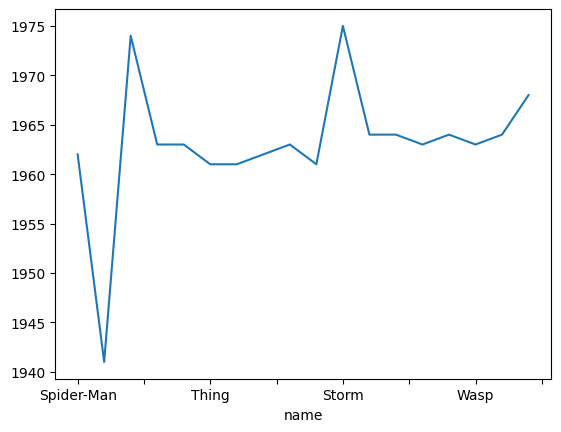

In [152]:
marval_df.first_appearance.plot()

(array([ 1.,  0.,  0.,  0.,  0.,  3., 11.,  1.,  0.,  2.]),
 array([1941. , 1944.4, 1947.8, 1951.2, 1954.6, 1958. , 1961.4, 1964.8,
        1968.2, 1971.6, 1975. ]),
 <BarContainer object of 10 artists>)

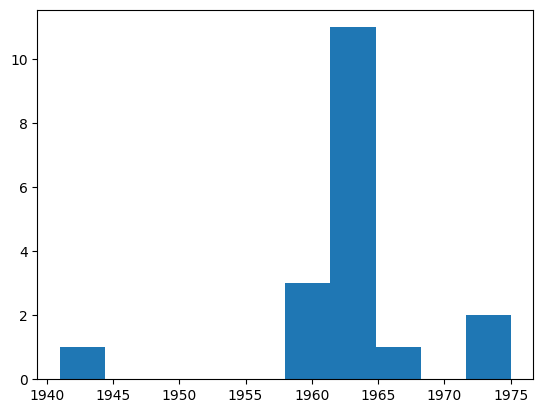

In [153]:
plt.hist(marval_df.first_appearance)